#**IMPORTING LIBRARIES STUFFS**

In [256]:
import nltk
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter
from nltk.tokenize import word_tokenize

#**WE GONNNA TRAIN OUR MODEL TO PREDICT THE NEXT WORD IN THIS DATA**

In [257]:
document = """Nepal: The Land of the Himalayas
Introduction
Nepal, officially known as the Federal Democratic Republic of Nepal, is a landlocked country located in South Asia, sharing its borders with China (Tibet Autonomous Region) to the north and India to the south, east, and west. Despite its small geographical size, Nepal is a country of immense diversity, not only in its landscapes but also in its culture, languages, ethnicities, and religions. Globally renowned for being home to Mount Everest (Sagarmatha), the world’s highest peak, Nepal captivates travelers, historians, and spiritual seekers alike.

Geography and Climate
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes of the Himalayan mountain ranges. The country is roughly rectangular in shape and can be geographically divided into three distinct regions:

Himalayan Region (Northern Belt): Dominated by high mountain ranges, this area includes the world's tallest mountains, including Mount Everest (8,848.86 meters), Kanchenjunga, Lhotse, and many others. The region is sparsely populated due to its harsh climate, with permanent snow and glaciers covering the upper parts.

Hilly Region (Central Belt): The mid-hills and valleys, including Kathmandu Valley, dominate this region. It is home to densely populated areas, terraced farms, and beautiful landscapes. The region has a temperate climate and is known for its rich cultural heritage.

Terai Region (Southern Belt): The flat, fertile plains bordering India are referred to as the Terai. This region is the agricultural heartland of Nepal and has a subtropical climate.

The diversity in altitude within a short distance gives rise to climatic variations ranging from subtropical to alpine, creating a wide range of ecological zones and supporting rich biodiversity. Nepal's rivers, such as the Koshi, Gandaki, and Karnali, which originate from the Himalayas, are important for agriculture, hydroelectricity, and cultural traditions.

Historical Background
Ancient and Medieval Periods
Nepal's history dates back to ancient times, with evidence of civilizations existing as early as the Neolithic period. It is believed that the region was inhabited by Kirats, who were among the earliest settlers.

The Lichhavi Dynasty (circa 400–750 CE) is often regarded as a golden era of Nepal’s early history, with the establishment of art, architecture, and trade routes. This was followed by the Malla period (12th to 18th centuries), which saw the flourishing of architecture and culture, particularly in the Kathmandu Valley, as the Malla kings competed to build temples, palaces, and public squares.

Unification of Nepal
In the mid-18th century, King Prithvi Narayan Shah of the Gorkha Kingdom successfully unified the fragmented kingdoms and principalities, creating the modern nation of Nepal. His vision of Nepal as a “yam between two boulders” (China and India) highlighted the country's delicate geopolitical position.

Rana Rule and British Relations
From the mid-19th century to the early 20th century, Nepal was under the autocratic rule of the Rana dynasty, who sidelined the monarchy and controlled the country with an iron grip. The Ranas established close ties with British India but kept Nepal isolated from much of the world.

Transition to Democracy
In 1951, a popular uprising supported by King Tribhuvan ended the Rana regime and ushered in a constitutional monarchy with multi-party democracy. However, this period was marked by political instability.

Monarchy to Republic
In 1996, Nepal entered a decade-long civil war (Maoist insurgency) aimed at abolishing the monarchy and establishing a people's republic. After years of conflict and subsequent peace agreements, the monarchy was officially abolished in 2008, and Nepal was declared a federal democratic republic.

Political Structure
Nepal is currently a parliamentary republic with a multi-party system. The country is divided into seven provinces under a federal system. The President is the ceremonial head of state, while executive power lies with the Prime Minister.

Nepal’s political landscape has been shaped by a series of constitutional changes, with the most recent Constitution of Nepal promulgated in 2015, marking a significant shift toward federalism and inclusivity. Despite these efforts, Nepal's politics continue to face challenges like frequent government changes, ethnic tensions, and the slow pace of development.

Cultural Diversity
Nepal is a melting pot of cultures, languages, and religions. Despite its small size, it is home to more than 125 ethnic groups and over 120 languages.

Ethnic Groups
Some of the major ethnic groups include the Chhetri, Brahmin, Magar, Tharu, Tamang, Newar, Gurung, Rai, Limbu, Sherpa, and Madhesi communities, each contributing uniquely to Nepal’s vibrant cultural fabric.

Languages
While Nepali is the official and most widely spoken language, many regional languages such as Maithili, Bhojpuri, Tharu, Tamang, and Newar are spoken across the country.

Religions
Nepal is a secular country but predominantly Hindu, with Hinduism practiced by about 81% of the population. Buddhism holds significant historical and cultural importance, as Nepal is the birthplace of Lord Buddha (Siddhartha Gautama) in Lumbini. Other religions include Islam, Christianity, and indigenous faiths.

Festivals
Nepal’s festivals are deeply tied to its religious and cultural diversity. Major celebrations include:

Dashain: The biggest Hindu festival, celebrating the victory of good over evil.

Tihar: Festival of lights, similar to Diwali in India.

Holi: Festival of colors.

Buddha Jayanti: Birth anniversary of Lord Buddha.

Teej: Women's festival of fasting and prayers for marital bliss.

Indra Jatra, Gai Jatra, and Bisket Jatra: Popular festivals of the Kathmandu Valley.

Economy
Nepal is classified as a developing country with a mixed economy. Agriculture has traditionally been the backbone of Nepal’s economy, contributing significantly to GDP and employment.

Key Economic Sectors
Agriculture: Rice, maize, wheat, and millet are staple crops. Livestock farming is also common.

Remittances: One of the largest sources of national income, with millions of Nepalis working abroad, particularly in the Gulf countries, Malaysia, and India.

Tourism: Nepal’s natural beauty, trekking routes, cultural heritage sites, and spiritual centers attract tourists worldwide.

Hydropower: Nepal has vast potential for hydroelectricity generation, though much of it remains untapped.

Small Industries and Handicrafts: Production of pashmina, carpets, metalworks, and wooden crafts.

Economic Challenges
Nepal’s economy faces numerous hurdles such as political instability, infrastructural limitations, over-reliance on remittances, natural disasters like earthquakes, and trade dependency on neighboring countries.

Tourism and Natural Beauty
Nepal is a global tourism hotspot known for:

Trekking and Mountaineering: Everest Base Camp, Annapurna Circuit, Langtang Valley, and many other trails attract adventure seekers.

World Heritage Sites: Kathmandu Valley’s Durbar Squares, Pashupatinath Temple, Swayambhunath (Monkey Temple), Lumbini (birthplace of Buddha), and Chitwan National Park are recognized by UNESCO.

Wildlife: The Terai region is rich in biodiversity with species like the Bengal tiger, one-horned rhinoceros, elephants, and gharials.

Spiritual Tourism: Many visitors come to Nepal for meditation, yoga retreats, and Buddhist pilgrimages.

Despite its immense tourism potential, challenges such as infrastructure gaps, political instability, and environmental concerns pose obstacles to sustainable growth.

Education and Healthcare
Nepal has made gradual progress in education, with rising literacy rates, especially among the younger generations. However, access to quality education, particularly in rural areas, remains a challenge.

In healthcare, Nepal has improved in areas like maternal and child health, but still struggles with the availability of advanced medical facilities in remote regions. Government and non-government organizations are actively working to improve the public health sector.

Society and Social Issues
Nepalese society is deeply traditional but evolving. Important social issues include:

Caste Discrimination: Although legally abolished, caste-based discrimination persists in some rural areas.

Gender Inequality: Women's rights have seen improvements, but issues like child marriage, dowry, and domestic violence continue to affect women’s empowerment.

Poverty: Although the poverty rate has declined over the years, many Nepalis still live under the poverty line, especially in rural communities.

Environmental Issues
Nepal is highly vulnerable to climate change impacts, including glacial lake outburst floods, erratic rainfall, landslides, and agricultural disruptions. Deforestation, pollution, and waste management are growing concerns, particularly in urban centers like Kathmandu.

However, there are also significant conservation efforts, including national parks, community forestry programs, and international cooperation on environmental sustainability.

Conclusion
Nepal is a country of incredible diversity and resilience. From the towering peaks of the Himalayas to the vibrant cultural traditions in its cities and villages, Nepal offers a unique blend of natural beauty, ancient history, and rich cultural heritage. While the country faces numerous challenges, including political instability, economic dependency, and environmental risks, the strength of its people, the richness of its traditions, and its potential for sustainable development point toward a hopeful future.

Nepal stands not just as a travel destination but as a living example of coexistence among diverse communities, faiths, and traditions. As the nation continues its journey toward stability and growth, its story will undoubtedly inspire generations to come.


India: The Cradle of Civilization and Diversity
Introduction
India, officially known as the Republic of India, is a vast, diverse, and ancient civilization located in South Asia. It is the seventh-largest country in the world by area and the most populous country, having surpassed China in population in 2023. India is known as the land of unity in diversity—a country where hundreds of languages, ethnic groups, religions, and traditions coexist, often interwoven in a remarkable cultural tapestry.

The country’s impact on the world spans thousands of years, from the rise of the Indus Valley Civilization and the teachings of the Buddha to its modern emergence as a global economic and technological powerhouse. India’s journey is as complex as it is fascinating, shaped by centuries of conquest, colonization, cultural evolution, and socio-political transformations.

Geography and Climate
India covers approximately 3.287 million square kilometers, stretching from the Himalayas in the north to the Indian Ocean in the south. It shares its borders with Pakistan, China, Nepal, Bhutan, Bangladesh, and Myanmar, and is flanked by the Arabian Sea to the west, the Bay of Bengal to the east, and the Indian Ocean to the south.

Geographical Divisions:
India’s geography is highly diverse, typically divided into the following regions:

The Northern Mountain Ranges: Home to the Himalayas, the world’s tallest mountain range, providing a natural border and influencing the country’s climate.

The Indo-Gangetic Plains: Fertile plains of the Ganges, Brahmaputra, and Indus rivers that are the agricultural heartland.

The Thar Desert: A vast arid region in Rajasthan.

The Deccan Plateau: A large plateau that occupies much of peninsular India, rich in minerals.

The Coastal Regions: Both the eastern and western coasts are lined with cities and ports crucial for trade.

The Islands: The Andaman and Nicobar Islands in the Bay of Bengal and the Lakshadweep Islands in the Arabian Sea.

Climate:
India experiences a wide variety of climates:

Tropical in the south

Arid in the west

Temperate in the northern plains

Alpine in the Himalayan regions

The country’s climate is heavily influenced by the monsoon system, which brings seasonal rainfall essential for agriculture.
"""

In [258]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [259]:
# tokenize
tokens = word_tokenize(document.lower())

In [260]:
# build vocab

vocab = {'unk': 0}
Counter(tokens) # shows how many times a token is repeated throughout the document

unique_tokens = Counter(tokens).keys()  # all the unique tokens

#**ASSIGNING ID TO THE EACH TOKEN**

In [261]:
for id, token in enumerate(unique_tokens):
  vocab[token] = id+1

In [262]:
vocab['nepal']

1

In [263]:
# extract sentences from data

input_sentences = document.split('\n')

#**FUNCTION TO CONVERT SENTENCES OF STRING TO LIST OF TOKENS**

In [264]:
def text_2_indices(text, vocab):

  numerical_sentence = []

  for item in text:
    if item in vocab:
      numerical_sentence.append(vocab[item])
    else:
      numerical_sentence.append(vocab['<unk>'])

  return numerical_sentence

In [265]:
sentences_numerical_form = []

for sentence in input_sentences:
   sentences_numerical_form.append(text_2_indices(word_tokenize(sentence.lower()), vocab))

In [266]:
sentences_numerical_form[:2]

[[1, 2, 3, 4, 5, 3, 6], [7]]

In [267]:
training_sequence = []

for sentence in sentences_numerical_form:

  for i in range(1, __builtins__.len(sentence)):
    training_sequence.append(sentence[: i+1])

In [268]:
# TO FIND THE MAXIMUM_LENGTH

max_L = 0
id = 0
for sent in training_sequence:
  if __builtins__.len(sent) > max_L:
    max_L = __builtins__.len(sent)

print(max_L)

107


In [269]:
training_sequence[:5]

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 3]]

#**Padding**

In [270]:
padded_sentences = []

for sentence in training_sequence:
   padded_sentences.append([0] * (max_L - __builtins__.len(sentence)) + sentence)

In [271]:
__builtins__.len(padded_sentences[56])

107

In [272]:
padded_training_sequence = torch.tensor(padded_sentences, dtype = torch.long)

In [273]:
padded_training_sequence

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   2,   3,   4],
        ...,
        [  0,   0,   0,  ..., 642, 776,  57],
        [  0,   0,   0,  ..., 776,  57, 181],
        [  0,   0,   0,  ...,  57, 181,  39]])

#**INPUT SENTENCES AND TARGETED WORD**

In [274]:
X = padded_training_sequence[:, :-1]
y = padded_training_sequence[:, -1]

#**DATASET STUFFS**

In [275]:
class CustomDataset(Dataset):

  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [276]:
dataset = CustomDataset(X, y)

In [277]:
__builtins__.len(dataset)

2048

In [278]:
dataset[2]

(tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 2, 3]),
 tensor(4))

In [279]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [280]:
for input, output in dataloader:
  print(input, output)  # the below one is of one batch which has size of 32
  break

tensor([[  0,   0,   0,  ..., 236, 591, 603],
        [  0,   0,   0,  ...,   8, 425,  28],
        [  0,   0,   0,  ..., 490, 592, 631],
        ...,
        [  0,   0,   0,  ..., 445,  33, 446],
        [  0,   0,   0,  ...,  67,   8,   1],
        [  0,   0,   0,  ...,  24, 665,  35]]) tensor([ 39, 420, 272,   2, 457, 278,   3, 120, 571,  65,  16,   3,   8, 132,
        183, 691, 107,   8,  16,   8, 724, 491,   1,  18, 421,  60, 128,  36,
        156,  20,  68, 666])


#**MODEL'S ARCHITECURE**

In [281]:
class LSTMModel(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, 128)
    self.lstm = nn.LSTM(128, 150, batch_first= True)
    self.fc = nn.Linear(150, vocab_size)

  def forward(self, x):
    embedded = self.embedding(x)
    intermediate, (final_hidden, final_cell) = self.lstm(embedded)
    output = self.fc(final_hidden.squeeze(0))
    return output

#**INSTANCE OF THE MODEL**

In [282]:
model = LSTMModel(__builtins__.len(vocab))

In [283]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

LSTMModel(
  (embedding): Embedding(777, 128)
  (lstm): LSTM(128, 150, batch_first=True)
  (fc): Linear(in_features=150, out_features=777, bias=True)
)

#**SOME USEFULL PARAMS**

In [284]:
epochs = 100

lr = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

#**TRAINING LOOP**

In [285]:
step = 10

losses_ = []
epochs_ = []

for epoch in range(epochs):
  total_loss = 0

  for batch_x, batch_y in dataloader:

    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    optimizer.zero_grad()

    output = model(batch_x)

    loss = criterion(output, batch_y)

    loss.backward()

    optimizer.step()

    total_loss += loss.item()

  epochs_.append(epoch+1)
  losses_.append(total_loss)

  if epoch % step == 0 or epoch == 99:
    print(f"Epoch: {epoch+1}, Loss: {total_loss:.4f}")

Epoch: 1, Loss: 396.7164
Epoch: 11, Loss: 119.1407
Epoch: 21, Loss: 24.4504
Epoch: 31, Loss: 9.2344
Epoch: 41, Loss: 5.8078
Epoch: 51, Loss: 4.6065
Epoch: 61, Loss: 4.0210
Epoch: 71, Loss: 3.6510
Epoch: 81, Loss: 3.3952
Epoch: 91, Loss: 3.3120
Epoch: 100, Loss: 3.1621


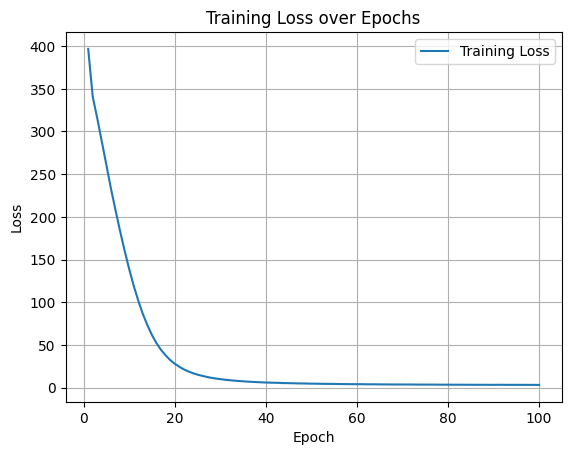

In [291]:
import matplotlib.pyplot as plt

plt.plot(epochs_, losses_, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

#**INFERENCE TIMEEEE**

In [292]:
def prediction(model, sentence, vocab):

  # tokenize
  tokenized_texts = word_tokenize(sentence.lower())

  # text to numerical_indices
  numerical_text = text_2_indices(tokenized_texts, vocab)

  # padding
  after_padded = torch.tensor([0] * (max_L - __builtins__.len(numerical_text)) + numerical_text, dtype = torch.long).unsqueeze(0)  # making it in batch size of 1

  # Move the input tensor to the same device as the model
  after_padded = after_padded.to(device)

  # send to model
  output = model(after_padded)


  # predicted_idx
  value, index = torch.max(output, dim = 1)

  # fetch the word via that index
  word = list(vocab.keys())[index]

  # merge with text
  if word == '.' or word == ',':
    sentence =  sentence + ""  + word

  else:
    sentence =  sentence + " "  + word

  return sentence

In [293]:
import time

input_text = "Nepal stretches"
for i in range(25):
  output_text = prediction(model, input_text, vocab)

  print(output_text)

  input_text = output_text
  time.sleep(1)

Nepal stretches approximately
Nepal stretches approximately 147,516
Nepal stretches approximately 147,516 square
Nepal stretches approximately 147,516 square kilometers
Nepal stretches approximately 147,516 square kilometers,
Nepal stretches approximately 147,516 square kilometers, lying
Nepal stretches approximately 147,516 square kilometers, lying along
Nepal stretches approximately 147,516 square kilometers, lying along the
Nepal stretches approximately 147,516 square kilometers, lying along the southern
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes of
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes of the
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes of the himalayan
Nepal stretches approximately 147,516 square kilometers, lying along the southern slopes of the himalaya

In [294]:
#logic
print(list(vocab.keys())[45])

diversity


In [297]:
!git clone https://github.com/ajheshbasnet/LSTM-NextWord.git

Cloning into 'LSTM-NextWord'...


In [298]:
!mv /content/NextWordPredictor.ipynb /content/LSTM-QNA/


mv: cannot stat '/content/NextWordPredictor.ipynb': No such file or directory
